# Penarikan Kesimpulan dan Pengujian Hipotesis
Tugas Besar IF2220 Probabilitas dan Statistika 

## Anggota
1. M. Athaullah Daffa Kusuma M (13522044)
2. Christopher Brian (13522106) 

## Enam Langkah Testing:
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.). 
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0. 
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis. 
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan. 
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan 

# Header and Loading Dataset to Variable


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# database murni
databasenya = pd.read_csv('banana.csv')

# database numeric only
databasenya1 = databasenya.loc[:, 'Acidity':'Price']
numeric_columns = databasenya1.select_dtypes(include=[np.number]).columns
databasenumeric = databasenya1.loc[:, numeric_columns]

# 1. Deskripsi Statistika (Descriptive Statistics)

## Penjelasan Atribut
- Count     : Jumlah Data
- Mean      : Rata-rata Data
- Std       : Standar Deviasi, untuk melihat seberapa jauh atau seberapa dekat nilai data dengan rata-ratanya.
- Min       : Nilai Minimal
- Max       : Nilai Maksimal
- 25%       : Kuartil Pertama
- 50%       : Kuartil kedua (Median)
- 75%       : Kuartil ketiga
- Modus     : Nilai yang paling sering muncul
- Variansi  : Seberapa jauh penyebaran data dari nilai rata-ratanya
- Range     : Selisih antara nilai terbesar dan terkecil
- IQR       : Selisih antara kuartil atas dan kuartil bawah
- Skewness  : Kemiringan distribusi data
- Kurtosis  : Derajat kepuncakan 


In [2]:
data_DesStat = databasenumeric.describe()
data_DesStat.loc['modus'] = databasenumeric.mode().loc[0]
data_DesStat.loc['variansi'] = databasenumeric.var()
data_DesStat.loc['range'] = data_DesStat.loc['max'] - data_DesStat.loc['min']
data_DesStat.loc['IQR'] = data_DesStat.loc['75%'] - data_DesStat.loc['25%']
data_DesStat.loc['skewness'] = databasenumeric.skew()
data_DesStat.loc['kurtosis'] = databasenumeric.kurt()
data_DesStat


,Acidity,Weight,Length,Appearance,Tannin,Ripeness,Sweetness,Firmness,Price
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,8.014830,150.011549,49.950434,4.965595,7.965435,6.743434,6.226319,0.507790,19969.669241
std,1.105781,1.194980,0.894599,1.014863,1.217188,0.680320,0.662980,0.292226,777.347464
min,4.456118,146.060922,46.418052,1.775864,4.291274,4.862560,3.033193,0.000254,-1.000000
25%,7.259942,149.227116,49.346508,4.258210,7.167241,6.268258,5.808028,0.254351,19953.093529
50%,8.005347,150.022865,49.923682,4.979534,8.022448,6.667618,6.312819,0.515483,19999.508312
75%,8.758361,150.827613,50.572027,5.653875,8.792184,7.164813,6.714660,0.758786,20047.301949
max,11.418636,154.070370,53.065151,8.233968,12.416177,9.482066,7.678689,2.000000,20281.431062
modus,4.456118,146.060922,46.418052,1.775864,4.291274,4.862560,3.033193,0.000254,0.000000
variansi,1.222752,1.427977,0.800307,1.029946,1.481546,0.462836,0.439543,0.085396,604269.080280


# 2. Outlier Pada Data

Untuk dapat mengetahui apakah terdapat outlier, digunakan metode melihat boxplot.

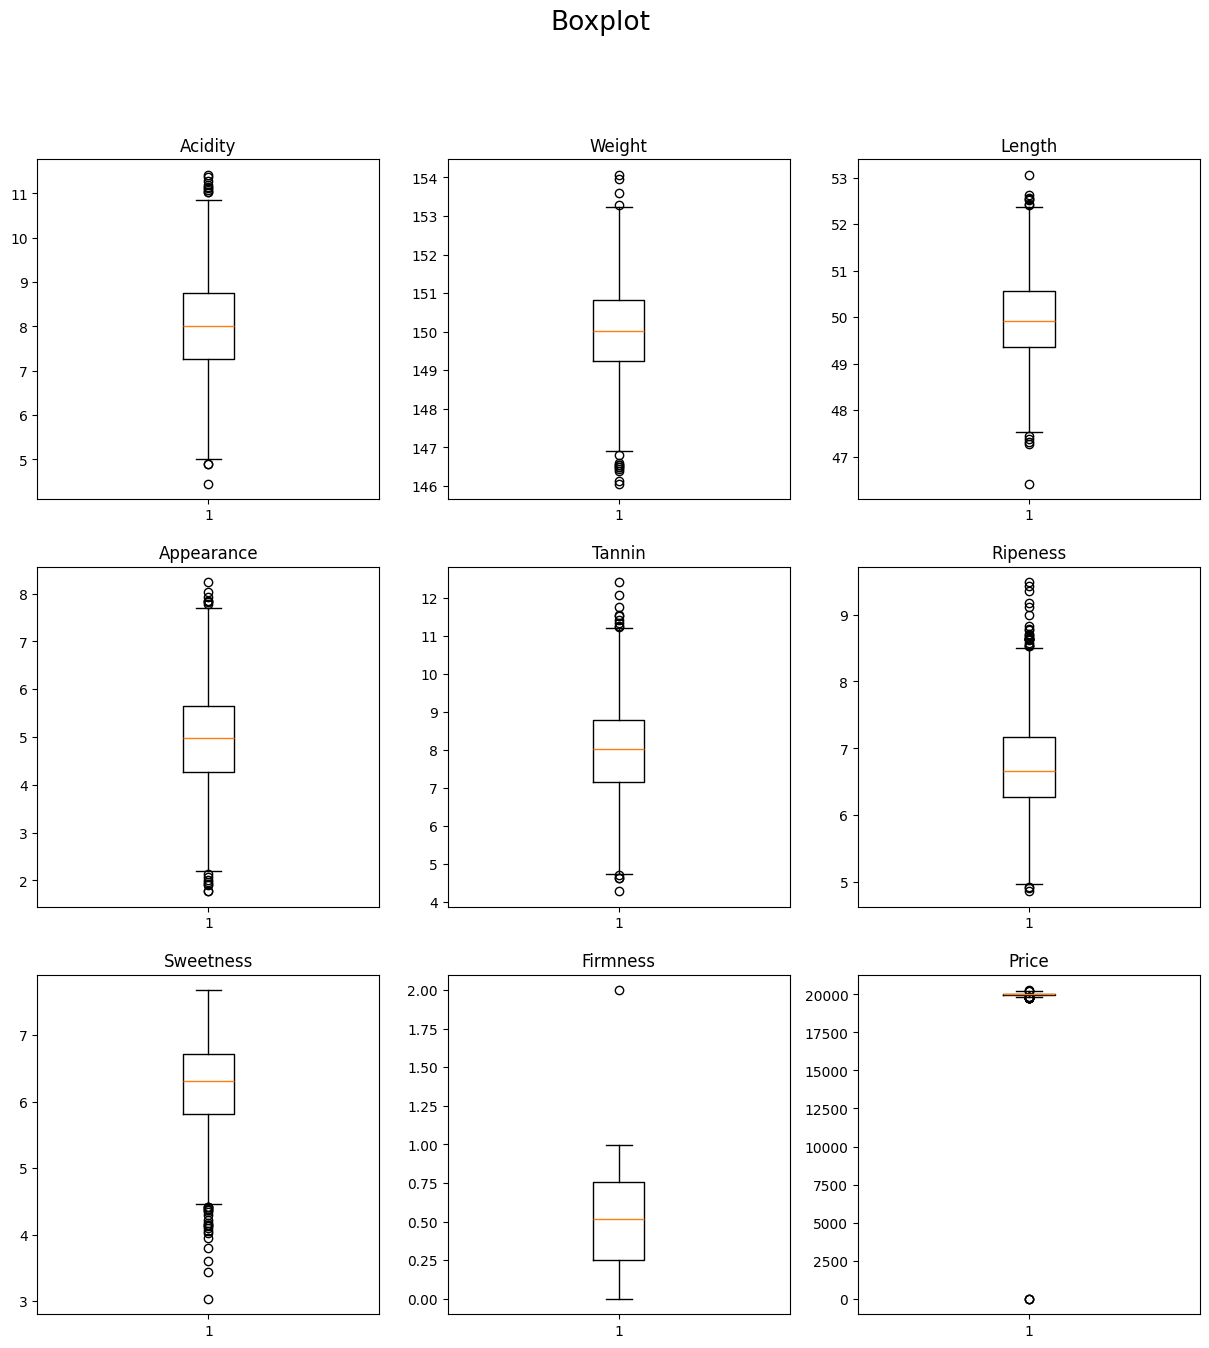

In [3]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
fig.suptitle('Boxplot', fontsize=19)
for i in range(3):
    for j in range(3):
        ax[i, j].boxplot(databasenumeric[databasenumeric.columns[i*3+j]])
        ax[i, j].set_title(databasenumeric.columns[i*3+j])

plt.show()

Berdasarkan boxplot di atas, kolom acidity, weight, length, appearance, tannin, ripeness, dan price memiliki outlier yang melewati batas atas dan batas bawah. Sedangkan kolom sweetness memiliki outlier yang melewati batas bawah dan kolom firmness memiliki outlier yang melewati batas atas.

Untuk menangani outlier ini, salah satu teknik umum untuk menangani outlier ini yaitu pemangkasan. Pemangkasan merupakan penghapusan data outlier tersebut dari dataset tersebut. Selain itu, juga dapat dilakukan Winsorizing pada data tersebut, yaitu mengganti nilai outlier tersebut dengan nilai persentil tertentu dalam rentang tertentu.